### 파일 읽기: 도시가스 수요가수 및 공급량
+ 작성: 임경호

### 1. 파일 읽기

In [54]:
import pandas as pd

# 기준년월
base_ym = '202304'

# 파일 위치 (파일 출처: 도식가스협회 통계 사이트)
path = 'D:/PythonProject/data-gatherer/gas/data/수요가수+공급량.xls'

# 컬럼 위치(회사): 0 회사
# 컬럼 위치(수요가수): 15 합계 / 16 증감률(%)
# 컬럼 위치(공급량 천MJ): 36 가정용 / 39 일반용 / 42 업무용 / 43 산업용 / 44 열병합1 / 45 열병합2 / 46 열전용설비용 / 47 수송용 / 48 연료전지용 / 49 합계 / 50 증감률(%)
use_cols= [0, 15, 16, 36, 39, 42, 43, 44, 45, 46, 47, 48, 49, 50]
df_data = pd.read_excel(path, sheet_name='수요가수공급량', usecols=use_cols)

In [55]:
df_data.columns = ['회사', '수요가수_합계', '수요가수_증감률', \
                   '공급량_가정용', '공급량_일반용', '공급량_업무용', '공급량_산업용', '공급량_열병합1', '공급량_열병합2', '공급량_열전용설비용', '공급량_수송용', '공급량_연료전지용', '공급량_합계', '공급량_증감률']
df_data.shape

(125, 14)

In [56]:
df_data.head(3)

,회사,수요가수_합계,수요가수_증감률,공급량_가정용,공급량_일반용,공급량_업무용,공급량_산업용,공급량_열병합1,공급량_열병합2,공급량_열전용설비용,공급량_수송용,공급량_연료전지용,공급량_합계,공급량_증감률
0,2023년 04월 용도별 수요가수 및 공급량 구분 (수도권),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,시도별,합 계,증감률,NaN,NaN,NaN,산업용,열병합,열병합,열전용,수송용,연료,합 계,증감률


### 2. 필요한 데이터만 추출 및 전처리

In [57]:
target_company = ['*서울(계)', '*삼천리(계)', '*부산(계)', '*대성(계)', '*경동(계)', '*CNCITY(계)']
df_target_data = df_data.query("회사 in @target_company")
df_target_data.shape

(6, 14)

In [58]:
df_target_data

,회사,수요가수_합계,수요가수_증감률,공급량_가정용,공급량_일반용,공급량_업무용,공급량_산업용,공급량_열병합1,공급량_열병합2,공급량_열전용설비용,공급량_수송용,공급량_연료전지용,공급량_합계,공급량_증감률
32,*서울(계),2634193,1.178913,3996678,1050568,206033,253910.054852,10814.271008,107686,81407,354698,51111.728992,6112906.054852,-17.193565
35,*삼천리(계),3378438,2.236381,4116415.320424,1347662.29889,473607.670997,4980676.662579,4013.988172,7051.657612,72238.36665,605792.942015,969671.373657,12577130.280996,-7.731603
97,*부산(계),1587788,0.758455,1853753.248875,526337.919058,64470.499838,1123995.374945,4755.222417,96.721148,7563.447747,300731.181241,196281.324236,4077984.939507,-12.667824
98,*대성(계),1215586,0.914098,2380331.151555,333249.620118,101546.831837,849620.982444,14642.582844,129.780413,38095.007252,266105.329233,7375.513169,3991096.798864,-20.556008
100,*CNCITY(계),681157,2.088051,954937,287055,101045,279093,537,93536,657,107945,41084,1865889,-6.653131
121,*경동(계),633334,1.231722,1058654.57523,271965.21927,33187.286,4193029.765023,1471.04981,116167.64429,50337.74708,124341.19535,142922.01199,5992076.494043,-35.606669


In [59]:
# 회사명에서 "(계)" 삭제: '(', ')'는 특수문자임
# df_target_data['회사'] = df_target_data['회사'].str.replace(pat='[^\w]계[^\w]', repl='', regex=True)
df_target_data.loc[:, ('회사')] = df_target_data['회사'].str.replace(pat='[^\w]계[^\w]', repl='', regex=True)

# 회사명에서 "*" 삭제: '*'는 특수문자임
# df_target_data['회사'] = df_target_data['회사'].str.replace(pat='[^\w]', repl='', regex=True)
df_target_data.loc[:, ('회사')] = df_target_data['회사'].str.replace(pat='[^\w]', repl='', regex=True)

In [60]:
# 인덱스 초기화
df_target_data.reset_index(drop=True, inplace=True)
print(f"도시가스사 수요가수 및 공급량(기준년월: {base_ym})")
df_target_data

도시가스사 수요가수 및 공급량(기준년월: 202304)


,회사,수요가수_합계,수요가수_증감률,공급량_가정용,공급량_일반용,공급량_업무용,공급량_산업용,공급량_열병합1,공급량_열병합2,공급량_열전용설비용,공급량_수송용,공급량_연료전지용,공급량_합계,공급량_증감률
0,서울,2634193,1.178913,3996678,1050568,206033,253910.054852,10814.271008,107686,81407,354698,51111.728992,6112906.054852,-17.193565
1,삼천리,3378438,2.236381,4116415.320424,1347662.29889,473607.670997,4980676.662579,4013.988172,7051.657612,72238.36665,605792.942015,969671.373657,12577130.280996,-7.731603
2,부산,1587788,0.758455,1853753.248875,526337.919058,64470.499838,1123995.374945,4755.222417,96.721148,7563.447747,300731.181241,196281.324236,4077984.939507,-12.667824
3,대성,1215586,0.914098,2380331.151555,333249.620118,101546.831837,849620.982444,14642.582844,129.780413,38095.007252,266105.329233,7375.513169,3991096.798864,-20.556008
4,CNCITY,681157,2.088051,954937,287055,101045,279093,537,93536,657,107945,41084,1865889,-6.653131
5,경동,633334,1.231722,1058654.57523,271965.21927,33187.286,4193029.765023,1471.04981,116167.64429,50337.74708,124341.19535,142922.01199,5992076.494043,-35.606669


In [34]:
# df_target_data = df_target_data.astype({'수요가수_합계' : 'float'})

In [61]:
df_target_data.dtypes

회사            object
수요가수_합계       object
수요가수_증감률      object
공급량_가정용       object
공급량_일반용       object
공급량_업무용       object
공급량_산업용       object
공급량_열병합1      object
공급량_열병합2      object
공급량_열전용설비용    object
공급량_수송용       object
공급량_연료전지용     object
공급량_합계        object
공급량_증감률       object
dtype: object

### 4. 그래프 (시각화)

In [62]:
import numpy as np

from matplotlib import rcParams
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # 경고창 무시

# 한글 폰트 설정
rcParams['font.family'] ='Malgun Gothic'
rcParams['axes.unicode_minus'] = False

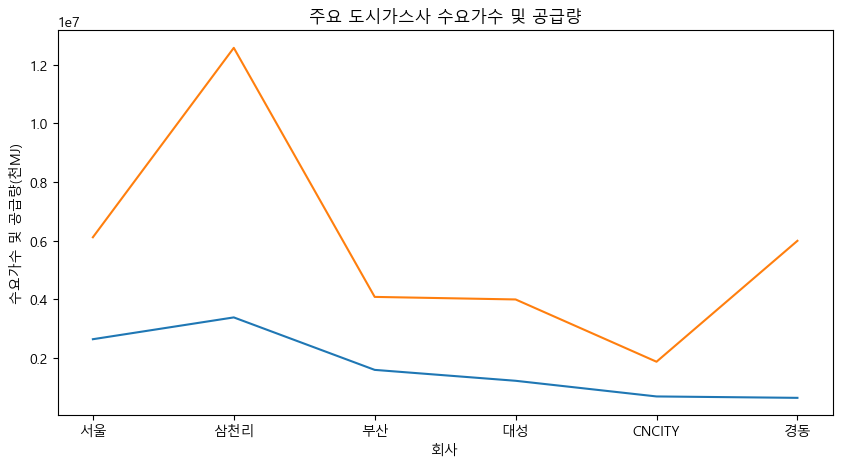

In [63]:
""" 하나의 그래프에 (1)수요가수, (2)공급량(천MJ) 같이 그리기 """

plt.figure(figsize=(10,5))
plt.plot(df_target_data['회사'], df_target_data['수요가수_합계'], \
         df_target_data['회사'], df_target_data['공급량_합계'])
plt.xlabel('회사')
plt.ylabel('수요가수 및 공급량(천MJ)')
plt.title('주요 도시가스사 수요가수 및 공급량')
plt.show();

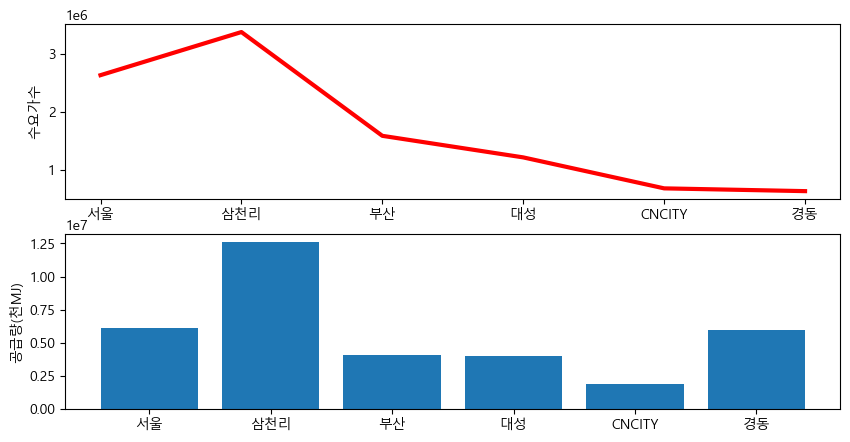

In [64]:
""" (1)수요가수, (2)공급량(천MJ) 각각 그래프 그리고 한 화면에 표시 """

plt.figure(figsize=(10,5))

plt.subplot(211)
line = plt.plot(df_target_data['회사'], df_target_data['수요가수_합계'])
plt.setp(line, color='r', linewidth=3.0)
# plt.xticks(np.arange(0, 3000000, 500000))
plt.ylabel('수요가수')

plt.subplot(212)
plt.bar(df_target_data['회사'], df_target_data['공급량_합계'])
# line = plt.plot(df_target_data['회사'], df_target_data['공급량_합계'])
# plt.setp(line, color='b', linewidth=3.0)
plt.ylabel('공급량(천MJ)')

plt.show();

In [65]:
import plotly.express as px

fig = px.bar(df_target_data, title="수요가수", x='회사', y='수요가수_합계', hover_data=df_target_data.columns, color='회사')
fig.show();

In [66]:
fig = px.bar(df_target_data, title="공급량(천MJ)", x='회사', y='공급량_합계', hover_data=df_target_data.columns, color='회사')
fig.show();